In [1]:
from __future__ import print_function, division
from collections import defaultdict, OrderedDict
import gzip
import pickle
import json
import os
import uproot
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from coffea import hist, processor 
from coffea.hist import plot
from coffea.util import load, save

In [2]:
year = '2017'
hists = load('v6_svmass_dxySig_explicitBins/doublebSF'+year+'.scaled')
gentype_map = {
    'bb':       0,
    'b':        1,
    'cc' :      2,
    'c':        3,
    'other':    4
}

category_map = {
        "pass": 1,
        "fail": 0
        }

In [3]:
bkg = hists['bkg']
data = hists['data']

In [4]:
#### 2016 Rebinning test
#pass_binning = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 2.5]
#bkg["template"] = bkg["template"].rebin("btagJP", hist.Bin("btagJP", "btagJP", pass_binning))

#fail_binning = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.5]
#data["template"] = data["template"].rebin("btagJP", hist.Bin("btagJP", "btagJP", fail_binning))
#bkg["template"] = bkg["template"].rebin("btagJP", hist.Bin("btagJP", "btagJP", fail_binning))
#data['template'].sum('')


#ZHbbvsQCD_binning = [0.53,1]
#bkg['svtemplate'].sum('process', 'gentype','ZHbbvsQCD').axis('svmass').edges()
#bkg['sv'] = bkg['svmass'].rebin('svmass', hist.Bin('svmass', 'svmass', testBin))
#print(bkg['svmass'].sum('process','gentype').values())

print(bkg['svtemplate'].sum('process', 'gentype','ZHbbvsQCD').axis('svmass').edges())

key='svtemplate'
testBin = np.array([-0.8, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,
        0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,
        1.4,  1.5,  1.6,  1.7,  1.8,  2.5,  3.2])
data[key] = data[key].rebin('svmass', hist.Bin('svmass', 'svmass', testBin))

#data[key] = data[key].rebin('svmass', hist.Bin('svmass', 'svmass', testBin))
#data[key]=data[key].rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD',ZHbbvsQCD_binning))

#print(data[key].sum('process','gentype').values())

[-0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4  0.5
  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9
  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9  3.   3.1  3.2]


In [5]:
data['template'].sum('process', 'gentype', 'ZHbbvsQCD', overflow='all').axis('btagJP').edges()

KeyError: 'template'

In [ ]:
#### QCD cutflow
bkg['cutflow'].sum('cut', 'process', overflow='all').values()

In [ ]:
#### data cutflow
data['cutflow'].sum('cut', 'process', overflow='all').values()

In [ ]:
#### yields by splitting gentype and dark Higgs pass/fail tagger (QCD)
gentype_names = ['bb', 'b', 'cc', 'c', 'other']
step1 = bkg['template'].sum('process', overflow='all')
for i in range(5):
    step2 = step1.integrate('gentype', i).values()
    print(gentype_names[i], 'fail:', step2[()][:,0].sum(), '/', gentype_names[i], 'pass:', step2[()][:,1].sum())

In [ ]:
#### yields by splitting dark Higgs pass/fail tagger (BTagMu data)
step1 = data['template'].sum('process', 'gentype', overflow='all').values()
print('fail:', step1[()][:,0].sum(), '/ pass:', step1[()][:,1].sum())

/home/jongho/Softwares/hep/lib/python3.10/site-packages/mplhep/__init__.py:49: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = fm.createFontList(font_files)


TypeError: 'bool' object is not iterable

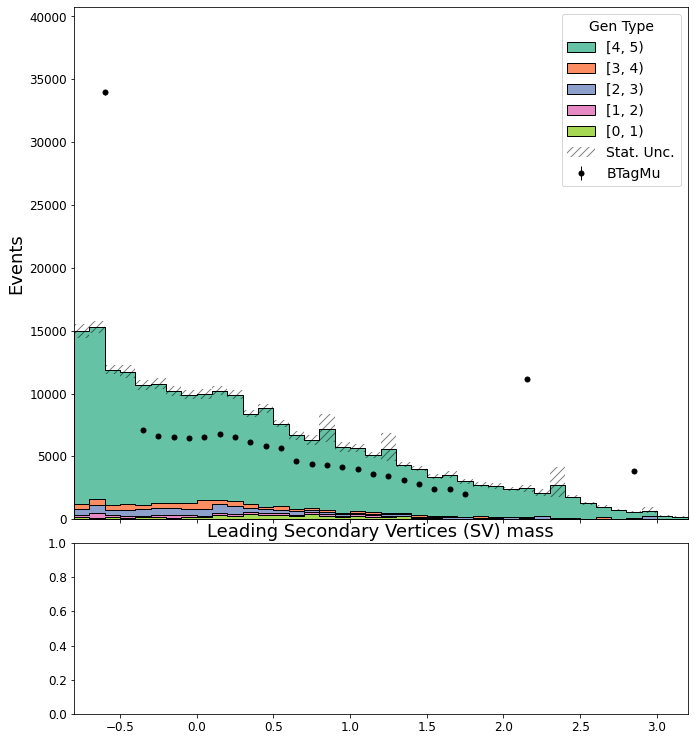

In [6]:
### Stack btagJP or svmass plot
### prefit drawing
#http://colorbrewer2.org/#type=qualitative&scheme=Paired&n=6 : colors
from cycler import cycler

key = 'svtemplate'
flag = 'fail'

massBin = [-0.8, -0.4, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 2.5, 3.2]

if year == '2016':
    #massBin = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 70, 100]
    if flag == 'fail':
        ZHbbvsQCD_binning = [0, 0.53]
    else:
        ZHbbvsQCD_binning = [0.53, 1]
elif year == '2017':
    #massBin = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 100]
    if flag == 'fail':
        ZHbbvsQCD_binning = [0, 0.61]
    else:
        ZHbbvsQCD_binning = [0.61, 1]
else:
    #massBin = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 70, 100]
    if flag == 'fail':
        ZHbbvsQCD_binning = [0, 0.65]
    else:
        ZHbbvsQCD_binning = [0.65, 1]

bkg[key]=bkg[key].rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD',ZHbbvsQCD_binning))
#bkg[key] = bkg[key].rebin('svmass', hist.Bin('svmass', 'svmass', massBin))

data[key]=data[key].rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD',ZHbbvsQCD_binning))
#data[key] = data[key].rebin('svmass', hist.Bin('svmass', 'svmass', massBin))


plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 1}
error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
data_err_opts = {'linestyle':'None', 'marker': '.', 'markersize': 10., 'color':'k'}
#colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c']
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3','#a6d854']

fig, (ax, rax) = plt.subplots(2, 1, figsize=(11,13), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
fig.subplots_adjust(hspace=.07)
ax.set_prop_cycle(cycler(color=colors))


plot.plot1d(data[key].sum('gentype', 'ZHbbvsQCD'),            
            overlay="process",
            ax=ax,
            clear=False,
            error_opts=data_err_opts
            )

plot.plot1d(bkg[key].sum('process', 'ZHbbvsQCD'),
            overlay="gentype",
            ax=ax,
            clear=False,
            stack=True,
            fill_opts=fill_opts,
            error_opts=error_opts
            )

plot.plotratio(data[key].sum('gentype', 'process', 'ZHbbvsQCD', oveflow='all'), 
               bkg[key].sum('gentype', 'process', 'ZHbbvsQCD', oveflow='all'),
               ax=rax,
               #overflow='over',
               error_opts=data_err_opts,
               denom_fill_opts={},
               guide_opts={},
               unc='num'
              )

rax.set_ylabel('Ratio (data/MC)')
rax.set_ylim(0.0,2.0)
rax.grid(axis='y')

ax._get_lines.prop_cycler = ax._get_patches_for_fill.prop_cycler
args = {'linestyle':'--', 'linewidth': 5}
ax.autoscale(axis='x', tight=True)
ax.set_xlabel('')
ax.set_ylim(0, 2e4)

handles, labels = ax.get_legend_handles_labels()
labels[0] = 'Others'
labels[1] = 'c'
labels[2] = 'cc'
labels[3] = 'b'
labels[4] = 'bb'
ax.legend(handles, labels)

if year == '2016':
    lumi = plt.text(1., 1., r"35.92 fb$^{-1}$ (13 TeV)", fontsize=17, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)
elif year == '2017':
    lumi = plt.text(1., 1., r"41.53 fb$^{-1}$ (13 TeV)", fontsize=17, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)
else:
    lumi = plt.text(1., 1., r"59.74 fb$^{-1}$ (13 TeV)", fontsize=17, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)

#fig.savefig('v4_svmass_dxySig/prefit_'+year+'_'+flag+'_linear.png')

ax.set_ylim(1e-1, 1e5)
ax.set_yscale('log')
#fig.savefig('v4_svmass_dxySig/prefit_'+year+'_'+flag+'.png')

/home/jongho/Softwares/hep/lib/python3.10/site-packages/coffea/hist/plot.py:359: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/home/jongho/Softwares/hep/lib/python3.10/site-packages/coffea/hist/plot.py:366: RuntimeWarning: invalid value encountered in true_divide
  rsumw_err = np.abs(poisson_interval(rsumw, sumw2_num / sumw_denom**2) - rsumw)
/home/jongho/Softwares/hep/lib/python3.10/site-packages/coffea/hist/plot.py:380: RuntimeWarning: invalid value encountered in true_divide
  denom_unc = poisson_interval(unity, sumw2_denom / sumw_denom**2)


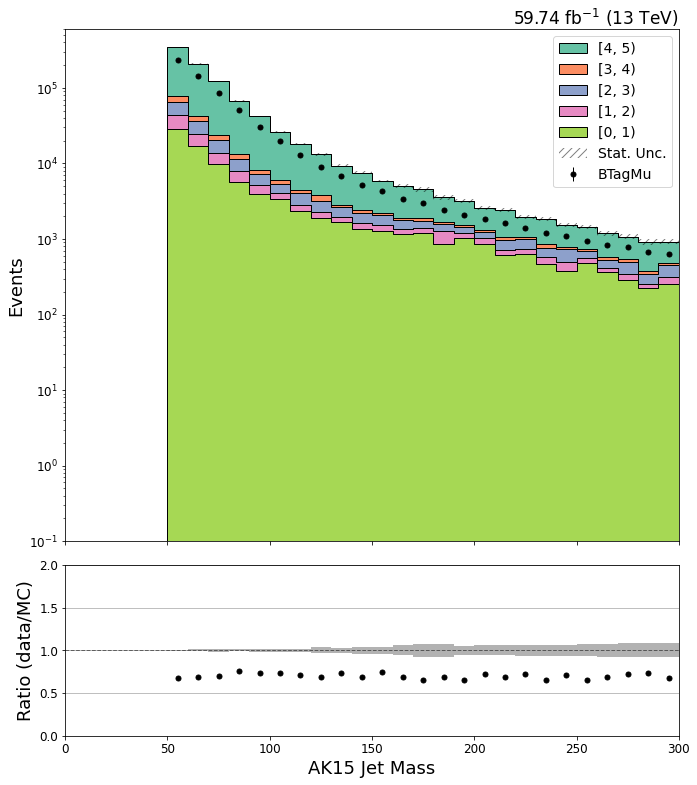

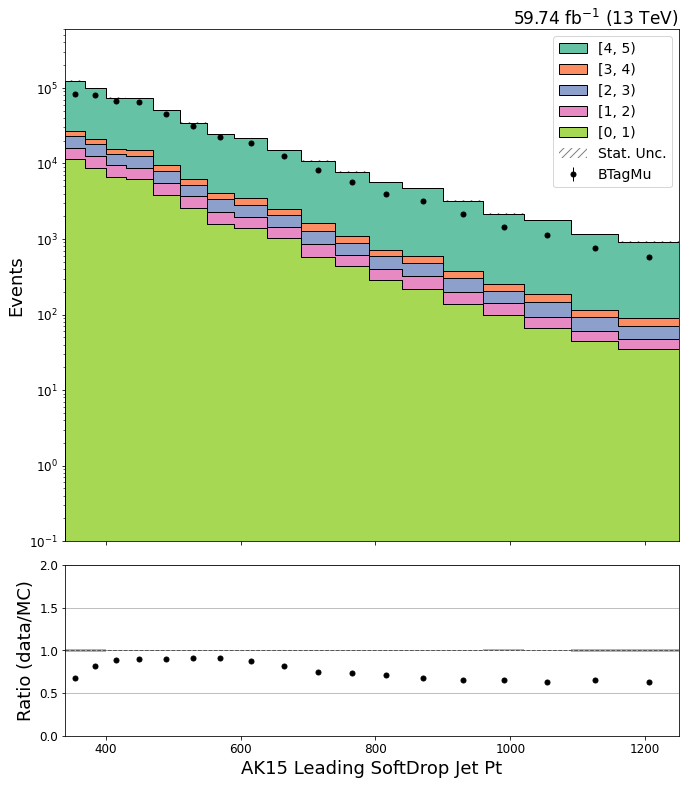

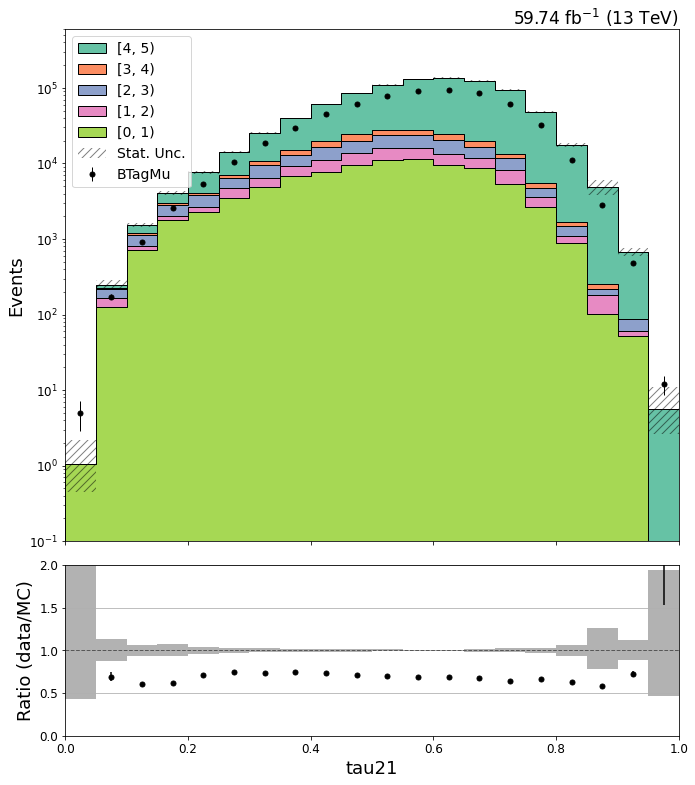

In [7]:
### Stack fjmass, fj1pt, tau21
### prefit drawing
#http://colorbrewer2.org/#type=qualitative&scheme=Paired&n=6 : colors
from cycler import cycler

plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 1}
error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
data_err_opts = {'linestyle':'None', 'marker': '.', 'markersize': 10., 'color':'k'}
#colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c']
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3','#a6d854']

for key in ['fjmass', 'fj1pt', 'tau21']:
    
    fig, (ax, rax) = plt.subplots(2, 1, figsize=(11,13), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
    fig.subplots_adjust(hspace=.07)
    ax.set_prop_cycle(cycler(color=colors))

    plot.plot1d(data[key].sum('gentype'),            
            overlay="process",
            ax=ax,
            clear=False,
            error_opts=data_err_opts
            )

    plot.plot1d(bkg[key].sum('process'),
            overlay="gentype",
            ax=ax,
            clear=False,
            stack=True,
            fill_opts=fill_opts,
            error_opts=error_opts
            )

    plot.plotratio(data[key].sum('gentype', 'process', oveflow='all'), 
               bkg[key].sum('gentype', 'process', oveflow='all'),
               ax=rax,
               #overflow='over',
               error_opts=data_err_opts,
               denom_fill_opts={},
               guide_opts={},
               unc='num'
              )

    rax.set_ylabel('Ratio (data/MC)')
    rax.set_ylim(0.0,2.0)
    rax.grid(axis='y')

    ax._get_lines.prop_cycler = ax._get_patches_for_fill.prop_cycler
    args = {'linestyle':'--', 'linewidth': 5}
    ax.autoscale(axis='x', tight=True)
    ax.set_xlabel('')
    ax.set_yscale('log')
    ax.set_ylim(1e-1, 6e5)
    leg = ax.legend(loc='best')

    #lumi = plt.text(1., 1., r"35.92 fb$^{-1}$ (13 TeV)", fontsize=17, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)
    #lumi = plt.text(1., 1., r"41.53 fb$^{-1}$ (13 TeV)", fontsize=17, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)
    lumi = plt.text(1., 1., r"59.74 fb$^{-1}$ (13 TeV)", fontsize=17, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)

    #fig.savefig('v2/prefit_'+year+'_'+key+'.png')

In [8]:
########## Shape comparsion for gentype ##########
fail2016 = [0, 0.53]
pass2016 = [0.53, 1]

fail2017 = [0, 0.61]
pass2017 = [0.61, 1]

fail2018 = [0, 0.65]
pass2018 = [0.65, 1]

hbkg ={}
hdata = {}
names = ['bb', 'b', 'cc', 'c', 'others']

key = 'svtemplate'

if year == '2016':
    hbkg['fail'] = bkg[key].rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD', fail2016))
    hdata['fail'] = data[key].rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD', fail2016))
    hbkg['pass'] = bkg[key].rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD', pass2016))
    hdata['pass'] = data[key].rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD', pass2016))
    
elif year == '2017':
    hbkg['fail'] = bkg[key].rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD', fail2017))
    hdata['fail'] = data[key].rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD', fail2017))
    hbkg['pass'] = bkg[key].rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD', pass2017))
    hdata['pass'] = data[key].rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD', pass2017))

else:
    hbkg['fail'] = bkg[key].rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD', fail2018))
    hdata['fail'] = data[key].rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD', fail2018))
    hbkg['pass'] = bkg[key].rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD', pass2018))
    hdata['pass'] = data[key].rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD', pass2018))
    
#x_bins = np.linspace(0.0, 2.5, num=25)
#x_bins = np.linspace(-0.8, 3.2, num=40)
x_bins = np.array([-0.4, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 2.5, 3.2])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,12), sharex=True)
#print(bkg_fail.sum('process','ZHbbvsQCD'))
#print(data_fail.sum('gentype', 'process','ZHbbvsQCD'))

cate = 'fail'

### Draw QCD per gentype
for i in range(5):
    tot = hbkg[cate].sum('process','ZHbbvsQCD').values()[()][i].sum()
    if tot == 0: continue
    temp = hbkg[cate].sum('process','ZHbbvsQCD').values()[()][i]/tot
    ax1.hist(x_bins, bins=x_bins.size, weights=temp, histtype='step', lw=2, label=names[i])
    ax2.hist(x_bins, bins=x_bins.size, weights=temp, histtype='step', lw=2, label=names[i])
    ax1.set_xlabel(year+' SV mass ('+cate+')', fontsize=15)
    ax2.set_xlabel(year+' SV mass ('+cate+') - log scale', fontsize=15)

### Draw data
tot = hdata[cate].sum('gentype', 'process','ZHbbvsQCD').values()[()].sum()
temp = hdata[cate].sum('gentype', 'process','ZHbbvsQCD').values()[()]/tot
n, bins = np.histogram(x_bins, bins=x_bins.size, weights=temp)
bins_mean = [0.5 * (bins[i] + bins[i+1]) for i in range(len(n))]
ax1.scatter(bins_mean, n, c='black', label='BTagMu')
ax1.legend(fontsize=15, loc='best')
ax2.scatter(bins_mean, n, c='black', label='BTagMu')
ax2.legend(fontsize=15, loc='best')

### Log scale for ax2 hist
ax2.set_yscale('log')

#fig.savefig('v4_svmass_dxySig//unstack_'+year+'_btagJP_'+cate+'.png')

ValueError: Axis <Bin (name=ZHbbvsQCD) instance at 0x7f6b973519f0> has no interval that fully contains identifier <Interval ([0.61, inf)) instance at 0x7f6b9b4f2620>

In [ ]:
hists16 = load('v3_svmass/doublebSF2016.scaled')
hists17 = load('v3_svmass/doublebSF2017.scaled')
hists18 = load('v3_svmass/doublebSF2018.scaled')

bkg16 = hists16['bkg']
data16 = hists16['data']
bkg17 = hists17['bkg']
data17 = hists17['data']
bkg18 = hists18['bkg']
data18 = hists18['data']

fail2016 = [0, 0.53]
pass2016 = [0.53, 1]

fail2017 = [0, 0.61]
pass2017 = [0.61, 1]

fail2018 = [0, 0.65]
pass2018 = [0.65, 1]

hbkg16 = {}
hdata16 = {}
hbkg17 = {}
hdata17 = {}
hbkg18 = {}
hdata18 = {}

key = 'svtemplate'

hbkg16['fail'] = bkg16[key].rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD', fail2016))
hdata16['fail'] = data16[key].rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD', fail2016))
hbkg16['pass'] = bkg16[key].rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD', pass2016))
hdata16['pass'] = data16[key].rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD', pass2016))
    
hbkg17['fail'] = bkg17[key].rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD', fail2017))
hdata17['fail'] = data17[key].rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD', fail2017))
hbkg17['pass'] = bkg17[key].rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD', pass2017))
hdata17['pass'] = data17[key].rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD', pass2017))

hbkg18['fail'] = bkg18[key].rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD', fail2018))
hdata18['fail'] = data18[key].rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD', fail2018))
hbkg18['pass'] = bkg18[key].rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD', pass2018))
hdata18['pass'] = data18[key].rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD', pass2018))

names = ['bb', 'b', 'cc', 'c', 'others']

x_bins = np.array([5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50., 55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,12), sharex=True)
#print(bkg_fail.sum('process','ZHbbvsQCD'))
#print(data_fail.sum('gentype', 'process','ZHbbvsQCD'))

cate = 'pass'

### Draw QCD per gentype
for i in range(5):
    tot16 = hbkg16[cate].sum('process','ZHbbvsQCD').values()[()][i].sum()
    tot17 = hbkg17[cate].sum('process','ZHbbvsQCD').values()[()][i].sum()
    tot18 = hbkg18[cate].sum('process','ZHbbvsQCD').values()[()][i].sum()
    
    w16 = hbkg16[cate].sum('process','ZHbbvsQCD').values()[()][i]/tot16
    w17 = hbkg17[cate].sum('process','ZHbbvsQCD').values()[()][i]/tot17
    w18 = hbkg18[cate].sum('process','ZHbbvsQCD').values()[()][i]/tot18
    
    print(w16.size)
    
    ax1.hist(x_bins, bins=x_bins.size, weights=w16, histtype='step', lw=2, label='2016_'+names[i])
    ax1.hist(x_bins, bins=x_bins.size, weights=w17, histtype='step', lw=2, label='2017_'+names[i])
    ax1.hist(x_bins, bins=x_bins.size, weights=w18, histtype='step', lw=2, label='2018_'+names[i])
        
    ax2.hist(x_bins, bins=x_bins.size, weights=w16, histtype='step', lw=2, label='2016_'+names[i])
    ax2.hist(x_bins, bins=x_bins.size, weights=w17, histtype='step', lw=2, label='2017_'+names[i])
    ax2.hist(x_bins, bins=x_bins.size, weights=w18, histtype='step', lw=2, label='2018_'+names[i])
    
    ax1.set_xlabel('SV mass ('+cate+')', fontsize=15)
    ax2.set_xlabel('SV mass ('+cate+') - log scale', fontsize=15)
    
    ax1.legend(fontsize=15, loc='best')
    ax2.legend(fontsize=15, loc='best')
    ax2.set_yscale('log')
    
    fig.savefig('v3_svmass/gentype_'+names[i]+'_SVmass_'+cate+'.png')
    ax1.cla()
    ax2.cla()

### Draw data
tot16 = hdata16[cate].sum('gentype', 'process','ZHbbvsQCD').values()[()].sum()
tot17 = hdata17[cate].sum('gentype', 'process','ZHbbvsQCD').values()[()].sum()
tot18 = hdata18[cate].sum('gentype', 'process','ZHbbvsQCD').values()[()].sum()

w16 = hdata16[cate].sum('gentype', 'process','ZHbbvsQCD').values()[()]/tot16
w17 = hdata17[cate].sum('gentype', 'process','ZHbbvsQCD').values()[()]/tot17
w18 = hdata18[cate].sum('gentype', 'process','ZHbbvsQCD').values()[()]/tot18

n16, bins = np.histogram(x_bins, bins=x_bins.size, weights=w16)
n17, ____ = np.histogram(x_bins, bins=x_bins.size, weights=w17)
n18, ____ = np.histogram(x_bins, bins=x_bins.size, weights=w18)

bins_mean = [0.5 * (bins[i] + bins[i+1]) for i in range(len(n16))]

ax1.scatter(bins_mean, n16, marker='o', label='2016 BTagMu')
ax1.scatter(bins_mean, n17, marker='v', label='2017 BTagMu')
ax1.scatter(bins_mean, n18, marker='s', label='2018 BTagMu')

ax2.scatter(bins_mean, n16, marker='o', label='2016 BTagMu')
ax2.scatter(bins_mean, n17, marker='v', label='2017 BTagMu')
ax2.scatter(bins_mean, n18, marker='s', label='2018 BTagMu')
ax2.set_yscale('log')

ax1.legend(fontsize=15, loc='best')
ax2.legend(fontsize=15, loc='best')

ax1.set_xlabel('SV mass ('+cate+')', fontsize=15)
ax2.set_xlabel('SV mass ('+cate+') - log scale', fontsize=15)

ax1.grid()
ax2.grid()

fig.savefig('v3_svmass/data_btagJP_'+cate+'.png')

In [ ]:
hists16 = load('v2/doublebSF2016.scaled')
hists17 = load('v2/doublebSF2017.scaled')
hists18 = load('v2/doublebSF2018.scaled')

bkg16 = hists16['bkg']
data16 = hists16['data']
bkg17 = hists17['bkg']
data17 = hists17['data']
bkg18 = hists18['bkg']
data18 = hists18['data']

names = ['bb', 'b', 'cc', 'c', 'others']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,12), sharex=True)

for key in bkg16.keys():
    if key == 'btagJP': continue
    if key == 'ZHbbvsQCD': continue
    if key == 'sumw': continue
    if key == 'cutflow': continue
    if key == 'template': continue
        
    if key == 'fjmass':
        x_bins = np.linspace(0.0, 300, num=30)
    elif key == 'tau21':
        x_bins = np.linspace(0.0, 1.0, num=20)
    elif key == 'fj1pt':
        x_bins = np.array([370.0, 400.0, 430.0, 470.0, 510.0, 550.0, 590.0, 640.0, 690.0, 740.0, 790.0, 840.0, 900.0, 960.0, 1020.0, 1090.0, 1160.0, 1250.0])
    
    print(key)
    
    #### Draw QCD
    for i in range(5):        
        tot16 = bkg16[key].sum('process').values()[()][i].sum()
        tot17 = bkg17[key].sum('process').values()[()][i].sum()
        tot18 = bkg18[key].sum('process').values()[()][i].sum()
        
        w16 = bkg16[key].sum('process').values()[()][i]/tot16
        w17 = bkg17[key].sum('process').values()[()][i]/tot17
        w18 = bkg18[key].sum('process').values()[()][i]/tot18
        
        ax1.hist(x_bins, bins=x_bins.size, weights=w16, histtype='bar', stacked=True, label='2016_'+names[i])
        ax1.hist(x_bins, bins=x_bins.size, weights=w17, histtype='bar', stacked=True, label='2017_'+names[i])
        ax1.hist(x_bins, bins=x_bins.size, weights=w18, histtype='bar', stacked=True, label='2018_'+names[i])
        
        ax2.hist(x_bins, bins=x_bins.size, weights=w16, histtype='bar', stacked=True, label='2016_'+names[i])
        ax2.hist(x_bins, bins=x_bins.size, weights=w17, histtype='bar', stacked=True, label='2017_'+names[i])
        ax2.hist(x_bins, bins=x_bins.size, weights=w18, histtype='bar', stacked=True, label='2018_'+names[i])

        ax1.set_xlabel(key, fontsize=15)
        ax2.set_xlabel(key+' - log scale', fontsize=15)

        ax1.legend(fontsize=15, loc='best')
        ax2.legend(fontsize=15, loc='best')
        
        ax2.set_yscale('log')
        fig.savefig('v2/'+key+'_stack_'+names[i]+'.png')

        ax1.cla()
        ax2.cla()

    #### Draw data
    tot16 = data16[key].sum('gentype', 'process').values()[()].sum()
    tot17 = data17[key].sum('gentype', 'process').values()[()].sum()
    tot18 = data18[key].sum('gentype', 'process').values()[()].sum()
    
    w16 = data16[key].sum('gentype', 'process').values()[()][i]/tot16
    w17 = data17[key].sum('gentype', 'process').values()[()][i]/tot17
    w18 = data18[key].sum('gentype', 'process').values()[()][i]/tot18
        
    
    #tot = data[key].sum('gentype', 'process').values()[()].sum()
    #temp = data[key].sum('process', 'gentype').values()[()]/tot
    #n, bins = np.histogram(x_bins, bins=x_bins.size, weights=temp)
    #bins_mean = [0.5 * (bins[i] + bins[i+1]) for i in range(len(n))]
    #plt.scatter(bins_mean, n, c='black', label='BTagMu')
    #ax.legend(fontsize=15, loc='best')

'''
### Draw data
tot16 = hdata16[cate].sum('gentype', 'process','ZHbbvsQCD').values()[()].sum()
tot17 = hdata17[cate].sum('gentype', 'process','ZHbbvsQCD').values()[()].sum()
tot18 = hdata18[cate].sum('gentype', 'process','ZHbbvsQCD').values()[()].sum()

w16 = hdata16[cate].sum('gentype', 'process','ZHbbvsQCD').values()[()]/tot16
w17 = hdata17[cate].sum('gentype', 'process','ZHbbvsQCD').values()[()]/tot17
w18 = hdata18[cate].sum('gentype', 'process','ZHbbvsQCD').values()[()]/tot18

n16, bins = np.histogram(x_bins, bins=x_bins.size, weights=w16)
n17, ____ = np.histogram(x_bins, bins=x_bins.size, weights=w17)
n18, ____ = np.histogram(x_bins, bins=x_bins.size, weights=w18)

bins_mean = [0.5 * (bins[i] + bins[i+1]) for i in range(len(n16))]

ax1.scatter(bins_mean, n16, marker='o', label='2016 BTagMu')
ax1.scatter(bins_mean, n17, marker='v', label='2017 BTagMu')
ax1.scatter(bins_mean, n18, marker='s', label='2018 BTagMu')

ax2.scatter(bins_mean, n16, marker='o', label='2016 BTagMu')
ax2.scatter(bins_mean, n17, marker='v', label='2017 BTagMu')
ax2.scatter(bins_mean, n18, marker='s', label='2018 BTagMu')
ax2.set_yscale('log')

ax1.legend(fontsize=15, loc='best')
ax2.legend(fontsize=15, loc='best')

ax1.set_xlabel('btagJP ('+cate+')', fontsize=15)
ax2.set_xlabel('btagJP ('+cate+') - log scale', fontsize=15)

ax1.grid()
ax2.grid()

fig.savefig('v2/data_btagJP_'+cate+'.png')
'''

In [ ]:
### one figure per one gentype

plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})


x_bins = np.linspace(0.0, 2.5, num=25)
names = ['bb', 'b', 'cc', 'c', 'others']
key = 'btagJP'

for i in range(5):

    fig, ax = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(10,12),
    sharex=True
    )
    

    tot = bkg[key].sum('process').values()[()][i].sum()
    if tot == 0: continue
    temp = bkg[key].sum('process').values()[()][i]/tot
    plt.hist(x_bins, bins=x_bins.size, weights=temp, histtype='step', lw=2, label=names[i])
    ax.set_xlabel(key, fontsize=15)
    ax.legend(fontsize=15)
    #fig.savefig(key+'_QCD_'+names[i]+'.png')

In [ ]:
plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})

fig, ax = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(10,12),
    sharex=True
)

hist.plot1d(sig['btagJP'].sum('gentype'), overlay='process')
x_bins = np.linspace(0.0, 1.0, num=25)

print(x_bins.size)

names = ['bb', 'b', 'cc', 'c', 'others']

for i in range(5):
    tot = bkg['btagJP'].sum('process').values()[()][i].sum()
    if tot == 0: continue
    temp = bkg['btagJP'].sum('process').values()[()][i]/tot
    plt.hist(x_bins, bins=25, weights=temp, histtype='step', lw=2, label=names[i])


ax.set_ylim(0.001, 0.5)
ax.set_yscale('log')
ax.legend(fontsize=11)
#fig.savefig('btagJP.png')

In [ ]:
########################### Signal ###########################
hist_sig = load('doublebSFsignal.scaled')

sig = hist_sig['sig']
category_map = {
        "pass": 1,
        "fail": 0
        }

In [ ]:
for key in sig.keys():
    if key == 'sumw' or key == 'template' or key == 'cutflow': continue
    for ipro in sig[key].identifiers('process'):
        yld = sig[key].integrate('process', ipro).sum('gentype', key, overflow='all').values()[()]
        print(ipro, key, yld)
        sig[key].scale({ipro:1./yld},axis='process')

In [ ]:
plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})

for key in sig.keys():
    if not (key == 'btagJP' or key == 'ZHbbvsQCD'): continue
    #if key == 'sumw' or key == 'cutflow' or key == 'template': continue
        
    fig, ax = plt.subplots(
        nrows=1,
        ncols=1,
        figsize=(10,10),
        sharex=True
    )
        
    hist.plot1d(sig[key].sum('gentype', overflow='all'), overlay='process')
    #ax.legend(fontsize=12)
    #ax.get_legend().remove()
    if key == 'fj1pt':
        ax.set_ylim(0.01, 0.1)
        #ax.set_yscale('log')
    #fig.savefig(key+'_signal.png')